In [8]:
import numpy as np
import ConformaQuantile as CQ
import importlib
import kappa as kp
import matplotlib.pyplot as plt
importlib.reload(CQ)
importlib.reload(kp)

<module 'kappa' from '/Users/wangyanbo/conformal/kappa.py'>

In [2]:
quantile = 0.6
n_samples = 3000
n_X1 = 20
n_X2 = 2
n_X3 = 2
np.random.seed(0)

X1 = abs(np.random.normal(6.4, 10, (n_samples, n_X1)))
X2 = abs(np.random.normal(0.4, 1, (n_samples, n_X2)))
X3 = abs(np.random.normal(0.9, 1, (n_samples, n_X3)))

coefficients = abs(np.random.normal(10, 400, n_X1 + n_X2))
X = np.hstack((X1, X2, X3))
noise = np.random.normal(0, 1, n_samples)

X_true = X[:, :(n_X1 + n_X2)]
# here we don't include the unobserved variables
X_observed = np.hstack((X1, X2))
Y = np.dot(X_true, coefficients)


train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

In [3]:
loss = {}
models = ['linear', 'quantile', 'lasso', 'ridge', 'random_forest', 'glm', 'neural_network', 'ko', 'quantile_net']

Y0 = np.random.exponential(Y)



for model in models:
    loss_unadjusted, loss_adjusted = CQ.perform_regression_analysis(X_observed, Y0, train_ratio, test_ratio, validation_ratio, quantile, model_type=model)
    # 将结果存储在字典中
    loss[model] = {'loss_unadjusted': loss_unadjusted, 'loss_adjusted': loss_adjusted}

min_loss_model = min(loss, key=lambda x: loss[x]['loss_adjusted'])
max_loss_model = max(loss, key=lambda x: loss[x]['loss_adjusted'])

print(f"\n拥有最小调整损失的模型：{min_loss_model}")
print(f"\n拥有最大调整损失的模型：{max_loss_model}")


linear loss unadjusted 23170.375042184536 loss_adjusted 22606.633121240488


/Users/wangyanbo/miniforge3/envs/ML/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


quantile loss unadjusted 23070.96955510488 loss_adjusted 22710.620028149002
lasso loss unadjusted 23170.3690986517 loss_adjusted 22606.640125440295
ridge loss unadjusted 23170.356604805584 loss_adjusted 22606.640018681497
random_forest loss unadjusted 23766.977457144458 loss_adjusted 23054.96822327783
glm loss unadjusted 23170.375042184536 loss_adjusted 22606.63312124048
neural_network loss unadjusted 35620.11879441224 loss_adjusted 22741.581422816915
ko loss unadjusted 29134.27396691043 loss_adjusted 28552.089426426224
quantile_net loss unadjusted 32549.662564468726 loss_adjusted 22665.176266391434

拥有最小调整损失的模型：glm

拥有最大调整损失的模型：ko


In [4]:
quantile_real = -np.log(1-quantile) / Y

kappa, d = kp.calculate_kappa_in(X_observed, Y0, quantile, 'quantile', quantile_real)

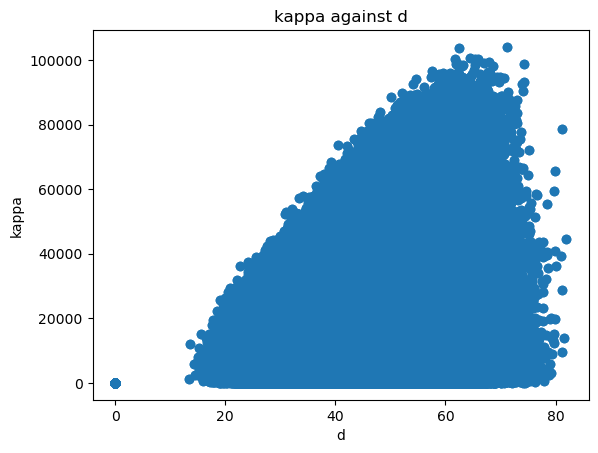

In [7]:
plt.scatter(d, kappa)
plt.xlabel('d')
plt.ylabel('kappa')
plt.title('kappa against d')
plt.show()


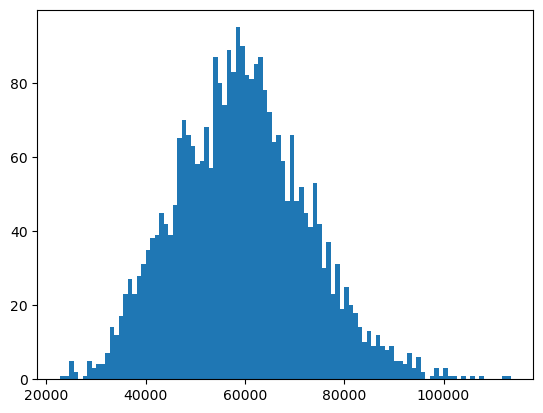

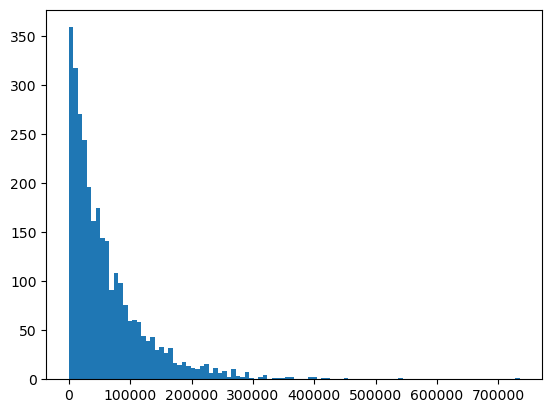

In [ ]:
import matplotlib.pyplot as plt
plt.hist(Y, bins=100)
plt.show()
plt.hist(Y0, bins=100)
plt.show()
